# **Logistic Regression for predict rainfall**

In [ ]:
# init
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, roc_curve, roc_auc_score, classification_report
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.metrics import RocCurveDisplay

from sklearn.linear_model import LogisticRegression

import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def draw_ROC_curve(pred_positive_label, y_data):
  fpr, tpr, thresholds = roc_curve(y_data, pred_positive_label)
  precisions, recalls, thresholds = roc_curve(y_data, pred_positive_label)
  plt.figure(figsize=(5, 5))
  plt.plot([0, 1], [0, 1], label='Random (AUC = 0.5)')
  plt.plot(fpr, tpr, label='ROC (AUC = ' + str(round(roc_auc_score(y_data, pred_positive_label), 2)) + ')')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC curve')
  plt.legend()
  plt.grid()
  plt.show()

In [ ]:
def model_evaluation(data, predicted):
  mse = mean_squared_error(data, predicted)
  rmse = mse ** 0.5
  mae = mean_absolute_error(df_weather_test_output, r)
  print(f'MSE on validation : {mse:.4f}')
  print(f'RMSE on validation : {rmse:.4f}')
  print(f'MAE on validation : {mae:.4f}')

In [ ]:
def Gain_Lift_Chart(test_y, y_pred, n_bins=10):
    # sort the actual values in descending order of the prediction
    df = pd.DataFrame({'test_y': test_y, 'y_pred': y_pred})
    df = df.sort_values(by='y_pred', ascending=False).reset_index(drop=True)

    df['decile'] = pd.qcut(df.index, q=n_bins, labels=False)

    df['cumulative_positives'] = df['test_y'].cumsum()
    total_positives = df['test_y'].sum()
    df['gain'] = df['cumulative_positives'] / total_positives

    lift = []
    for i in range(n_bins):
        group = df[df['decile'] == i]
        if not group.empty:
            lift.append(group['test_y'].mean() / df['test_y'].mean())
        else:
            lift.append(0)

    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    axs[0].plot(np.linspace(0, 100, len(df)), df['gain'] * 100, label='Model')
    axs[0].plot([0, 100], [0, 100], '--', color='gray', label='Random')
    axs[0].set_title('Gains Chart')
    axs[0].set_xlabel('% Echantillon')
    axs[0].set_ylabel('% Positive')
    axs[0].legend()
    axs[0].grid(True)

    axs[1].bar(range(1, n_bins + 1), lift)
    axs[1].set_title('Lift Chart')
    axs[1].set_xlabel('Decile (1 = top 10%)')
    axs[1].set_ylabel('Lift')
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()


    # group the sorted predictions into 10 roughly equal groups and calculate the mean
    sorted_act_v = df['test_y']
    groups = [int(10 * i / len(sorted_act_v)) for i in range(len(sorted_act_v))]
    meanPercentile = sorted_act_v.groupby(groups).mean()
    meanResponse = meanPercentile / sorted_act_v.mean()
    meanResponse.index = (meanResponse.index + 1) * 10
    print('Lift based on meanResponse', meanResponse[10])
    random10 = sorted_act_v.cumsum().iloc[-1] / 10  # expected cumulative price without lift for 10% sales
    cumPred10 = sorted_act_v.cumsum().iloc[-1]  # cumulative price based on model for top 10%
    print('Expected cumulative price for 10% random sales', random10)

    print(f"Lift of the first decile (top 10%) : {lift[0]:.2f}")

In [ ]:
def draw_confusion_matrix(ground_truth, predicted):
  matrix = pd.DataFrame(confusion_matrix(ground_truth, predicted))
  matrix.index = ['Real 0', 'Real 1']
  matrix.columns = ['Predict 0', 'Predict 1']
  plt.figure(figsize=(2, 2))
  sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", cbar=False, linewidths=0.5, linecolor='gray')
  plt.title("Confusion matrix", fontsize=14)
  plt.xlabel("y_pred (predicted)")
  plt.ylabel("test_y (actual values)")
  plt.tight_layout()
  plt.show()

  accuracy = (matrix.iloc[1,1]+ matrix.iloc[0,0]) / matrix.values.sum()
  precision = (matrix.iloc[1,1] / matrix.iloc[1,1] + matrix.iloc[0,1]) if (matrix.iloc[1,1] + matrix.iloc[0,1]) > 0 else 0
  recall = (matrix.iloc[1,1] / matrix.iloc[1,1] + matrix.iloc[1,0]) if (matrix.iloc[1,1] + matrix.iloc[1,0]) > 0 else 0
  f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

  print(f"\nAccuracy:  {accuracy:.2f}")
  print(f"Precision: {precision:.2f}")
  print(f"Recall:    {recall:.2f}")
  print(f"F1 score:  {f1:.2f}\n")

In [ ]:
# get from file
df_weather = pd.read_csv('/content/drive/MyDrive/MLDM Team Project/kma_train.csv')
df_weather.head()

,id,date,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,-1.727310,0.627599,-0.727087,-0.723225,-0.695913,-0.524695,0.137597,-0.107539,-0.901998,-1.059927,-0.638778,0.0
1,1,-1.717827,0.002677,-1.007530,-0.846763,-0.949539,-0.449288,0.863480,0.210894,-0.927396,0.808150,1.825426,1.0
2,2,-1.708344,0.482800,-1.643202,-1.454951,-1.297100,-1.362541,-0.494190,-1.285743,-0.114649,0.994958,0.661774,0.0
3,3,-1.698860,0.642841,-1.250581,-1.217378,-1.268920,-1.262000,-0.863852,-0.330443,-1.079786,-1.246735,-1.323279,0.0
4,4,-1.689377,0.177960,-1.222537,-0.979804,-0.855604,-0.440910,1.488546,1.643844,-1.486160,-1.059927,0.182624,1.0


In [ ]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9132 entries, 0 to 9131
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             9132 non-null   int64  
 1   date           9132 non-null   float64
 2   pressure       9132 non-null   float64
 3   maxtemp        9132 non-null   float64
 4   temparature    9132 non-null   float64
 5   mintemp        9132 non-null   float64
 6   dewpoint       9132 non-null   float64
 7   humidity       9132 non-null   float64
 8   cloud          9132 non-null   float64
 9   sunshine       9132 non-null   float64
 10  winddirection  9132 non-null   float64
 11  windspeed      9132 non-null   float64
 12  rainfall       9132 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 927.6 KB


In [ ]:
# divide dataset into test and train
x_train, x_test, y_train, y_test = train_test_split(df_weather.drop(columns=['id', 'rainfall']), df_weather['rainfall'], test_size=0.2, random_state=42)

In [ ]:
# fitting the model
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
# evaluate model
print(model.predict(x_test))
print(model.score(x_test, y_test))

[0. 1. 0. ... 0. 1. 0.]
0.8719211822660099


In [ ]:
model_evaluation(y_test, model.predict(x_test))
print(classification_report(y_test, model.predict(x_test)))

MSE on validation : 0.1281
RMSE on validation : 0.3579
MAE on validation : 0.1161
              precision    recall  f1-score   support

         0.0       0.90      0.93      0.91      1303
         1.0       0.80      0.73      0.77       524

    accuracy                           0.87      1827
   macro avg       0.85      0.83      0.84      1827
weighted avg       0.87      0.87      0.87      1827



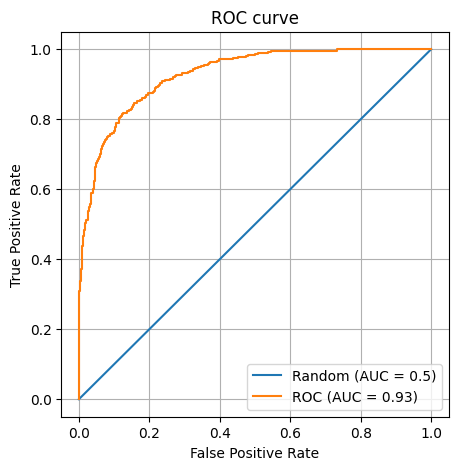

In [ ]:
draw_ROC_curve(model.predict_proba(x_test)[:, 1], y_test)

In [ ]:
df_weather_test = pd.read_csv('/content/drive/MyDrive/MLDM Team Project/kma_test.csv')
df_weather_test_input = df_weather_test.drop(columns=['id', 'rainfall'])
df_weather_test_output = df_weather_test['rainfall']

In [ ]:
df_weather_test_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           155 non-null    float64
 1   pressure       155 non-null    float64
 2   maxtemp        155 non-null    float64
 3   temparature    155 non-null    float64
 4   mintemp        155 non-null    float64
 5   dewpoint       155 non-null    float64
 6   humidity       155 non-null    float64
 7   cloud          155 non-null    float64
 8   sunshine       155 non-null    float64
 9   winddirection  155 non-null    float64
 10  windspeed      155 non-null    float64
dtypes: float64(11)
memory usage: 13.4 KB


In [ ]:
predict = model.predict(df_weather_test_input)

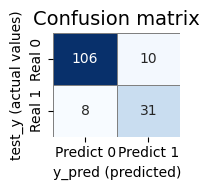


Accuracy:  0.88
Precision: 11.00
Recall:    9.00
F1 score:  9.90



In [ ]:
draw_confusion_matrix(df_weather_test_output, predict)

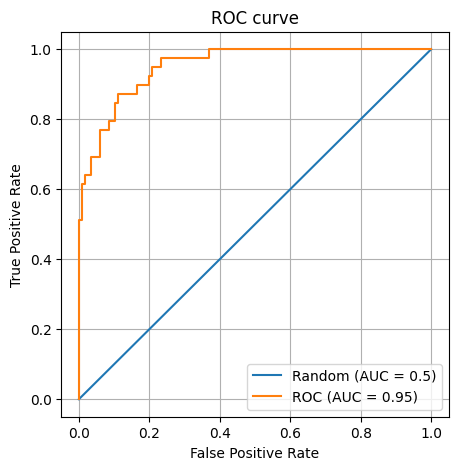

In [ ]:
draw_ROC_curve(model.predict_proba(df_weather_test_input)[:, 1], df_weather_test_output)

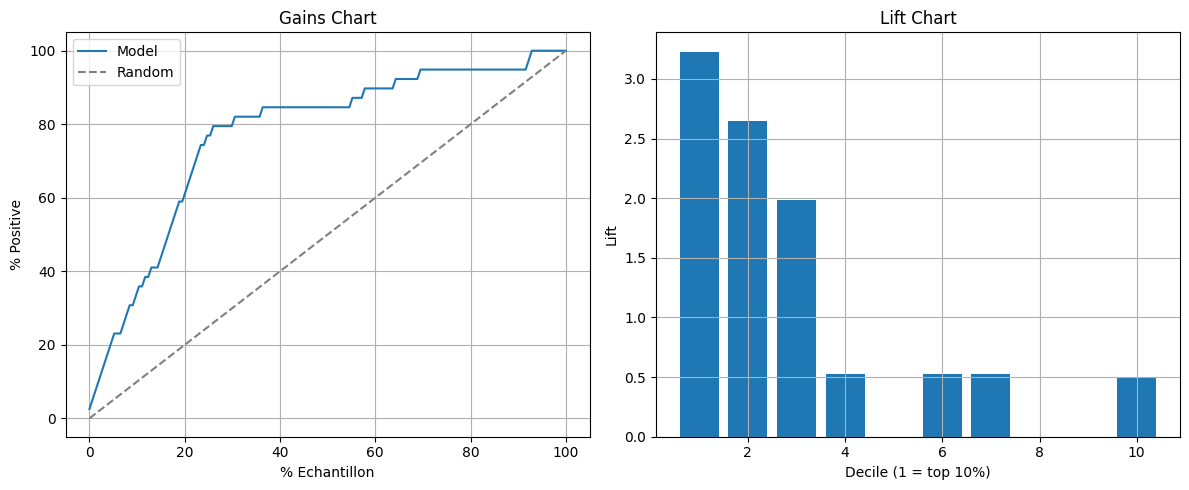

Lift based on meanResponse 3.229166666666667
Expected cumulative price for 10% random sales 3.9
Lift of the first decile (top 10%) : 3.23


In [ ]:
Gain_Lift_Chart(df_weather_test_output, predict)

In [ ]:
model_evaluation(df_weather_test_output, predict)

MSE on validation : 0.1161
RMSE on validation : 0.3408
MAE on validation : 0.1161
